### 머신러닝 프레임워크(Framework): scikit-learn
다양한 분류 및 회귀를 지원하며 검증하는 기능
분류, 회귀, 클러스터링, 차원축소가 가능하며 샘플데이터도 제공

### XOR 연산 학습해보기

In [3]:
xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [4]:
import pandas as pd

In [4]:
xor_df = pd.DataFrame(xor_input)
xor_df

,0,1,2
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [6]:
# Feature Data 추출
xor_data = xor_df.iloc[:,0:1+1]
# xor_data = xor_df[[0,1]] # 0,1 번째 열을 추출
xor_data

,0,1
0,0,0
1,0,1
2,1,0
3,1,1


In [8]:
# Target Data 추출
xor_target = xor_df.iloc[:,2]
xor_target

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

### 데이터 학습과 예측하기

In [5]:
from sklearn import svm, metrics

In [11]:
# 모델 만들기
clf = svm.SVC()

In [14]:
# 지도 학습 시키기
clf.fit(xor_data, xor_target)

SVC()

In [15]:
# 평가
pred = clf.predict(xor_data)
pred

array([0, 1, 1, 0], dtype=int64)

In [16]:
# 정답률 구하기
clf.score(xor_data, xor_target)

1.0

---
### 붓꽃의 품종 분류하기


In [6]:
iris = pd.read_csv('../Data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# 기본 통계량
iris.describe()

# mean: 평균
# 50%: 중앙값

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# NaN(Not a Number)값 확인
iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [11]:
# iris의 Sepal.Length의 NaN ?
iris['SepalLength'].isna().sum()
iris.SepalLength.isna().sum()

0

In [12]:
# iris의 Sepal.Length와 Sepal.Width의 NaN?
iris[['SepalLength', 'SepalWidth']].isna().sum()

SepalLength    0
SepalWidth     0
dtype: int64

In [13]:
# Name Column의 종류?
iris['Name'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
# Target으로 적합한 지 iris의 name feature의 종류별 갯수 확인하기
iris.Name.value_counts()
# Iris-setosa의 갯수
iris.Name[iris.Name == 'Iris-setosa'].count()
# 이름 / 갯수 찍어보기
for i in iris.Name.unique():
    print(f"{i} : {iris.Name[iris.Name == i].count()}")


Iris-setosa : 50
Iris-versicolor : 50
Iris-virginica : 50


In [ ]:
# Iris-setosa : red, Iris-versicolor : green, Iris-virginica
# iris에 color라는 컬럼으로 추가하기

# 방법1

for i in iris.Name.unique():
    iris.loc[iris.Name == 'Iris-setosa', 'color'] = 'red'
    iris.loc[iris.Name == 'Iris-versicolor', 'color'] = 'green'
    iris.loc[iris.Name == 'Iris-virginica', 'color'] = 'blue'

iris.head()



,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [35]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,color
145,6.7,3.0,5.2,2.3,Iris-virginica,blue
146,6.3,2.5,5.0,1.9,Iris-virginica,blue
147,6.5,3.0,5.2,2.0,Iris-virginica,blue
148,6.2,3.4,5.4,2.3,Iris-virginica,blue
149,5.9,3.0,5.1,1.8,Iris-virginica,blue


In [40]:
# 방법2

color_tmp = []

for name in iris.Name:
    if name == 'Iris-setosa':
        color_tmp.append('red')
    elif name == 'Iris-versicolor':
        color_tmp.append('green')
    else:
        color_tmp.append('blue')

iris['color'] = color_tmp
iris.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [41]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,color
145,6.7,3.0,5.2,2.3,Iris-virginica,blue
146,6.3,2.5,5.0,1.9,Iris-virginica,blue
147,6.5,3.0,5.2,2.0,Iris-virginica,blue
148,6.2,3.4,5.4,2.3,Iris-virginica,blue
149,5.9,3.0,5.1,1.8,Iris-virginica,blue


### 산점도(산포도, Scatter)

In [42]:
import matplotlib.pyplot as plt

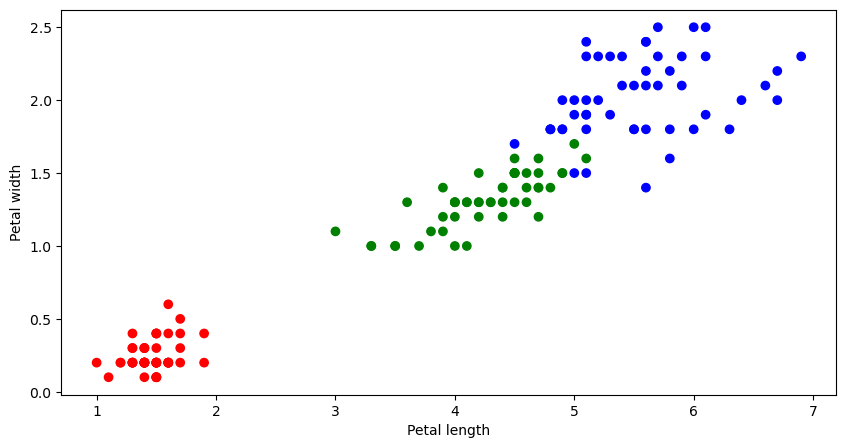

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(
    iris.PetalLength,
    iris.PetalWidth,
    c=iris.color
)

plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.show()

### Machine Leraning을 위한 작업

In [58]:
# Feature Data 만들기

# 방법1
iris_data = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
iris_data.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [64]:
# 방법2 iloc 활용

iris_data = iris.iloc[:,:3+1]
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [67]:
# Target 만들기
iris_target = iris.Name
iris_target[:5+1]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Name, dtype: object

In [69]:
# iris_target의 갯수 확인 (150개)
len(iris_target)

150

### 학습용 데이터와 테스트용 데이터로 나누기

In [70]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(
    iris_data,
    iris_target,
    random_state=42,
    test_size=0.2,  # 20% 데이터를 테스트 데이터로 사용
    stratify=iris.Name   # Name을 보면서 비율 맞추기(classification 인 경우)
    )



In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 8 to 3
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  120 non-null    float64
 1   SepalWidth   120 non-null    float64
 2   PetalLength  120 non-null    float64
 3   PetalWidth   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 38 to 28
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  30 non-null     float64
 1   SepalWidth   30 non-null     float64
 2   PetalLength  30 non-null     float64
 3   PetalWidth   30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [79]:
print(train_data.describe())
print(test_data.describe())

# train과 test의 평균과 중앙값 얼추 맞아야 함

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   120.000000  120.000000   120.000000  120.000000
mean      5.841667    3.044167     3.770833    1.204167
std       0.840926    0.445669     1.767417    0.763825
min       4.300000    2.000000     1.100000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.750000    3.000000     4.250000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000
       SepalLength  SepalWidth  PetalLength  PetalWidth
count    30.000000   30.000000    30.000000   30.000000
mean      5.850000    3.093333     3.710000    1.176667
std       0.788167    0.385901     1.781582    0.773119
min       4.400000    2.300000     1.000000    0.200000
25%       5.250000    2.925000     1.550000    0.200000
50%       6.050000    3.000000     4.500000    1.400000
75%       6.500000    3.300000     5.075000    1.800000
max       7.300000    4.000000     6.300000    2

In [77]:
len(train_target)

120

In [78]:
len(test_target)

30

## 학습 시키기

In [80]:
clf = svm.SVC() # scikit-learn 라이브러리의 svm 모듈에서 SVC 클래스를 인스턴스

In [81]:
clf.fit(train_data, train_target) # 지도 학습

SVC()

In [84]:
# 예측력
print(clf.score(train_data, train_target))
print(clf.score(test_data, test_target))

0.9833333333333333
0.9666666666666667


In [87]:
# 예측하기
test_data.head()

pred = clf.predict(test_data)
pred[:5+1]

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [88]:
test_target[:5+1]

38         Iris-setosa
127     Iris-virginica
57     Iris-versicolor
93     Iris-versicolor
42         Iris-setosa
56     Iris-versicolor
Name: Name, dtype: object

In [89]:
# 분류 Report
print(metrics.classification_report(test_target, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [91]:
# SepalLength: 4.1, SepalWidth : 3.5, PetalLength : 1.4, PetalWidth : 0.2
clf.predict([[4.1, 3.5, 1.4, 0.2]]) 

c:\Users\tj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [92]:
# SepalLength: 8.1, SepalWidth : 9.5, PetalLength : 11.4, PetalWidth : 1.2
clf.predict([[8.1, 9.5, 11.4, 1.2 ]])   # 실제로는 Iris-virginica가 아니지만 학습 한 데이터 중 가까운 데이터라고 예측함

c:\Users\tj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

In [93]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


---
### 분류 Report 이해하기
번호: [1,2,3,4,5,6]  
정답: [음치,음치,음치,음치,정상,정상]  
예측: [음치,음치,정상,정상,정상,정상]  

정확도: 예측이 맞은 비율  
==> 6명 중 4명 맞췄으므로 4 / 6 = 2 / 3 = 0.666  

정밀도: 음치라고 예측한 사람들 중 진짜 음치의 비율  
==> 2 / 2 = 1.0  

재현율: 전체 음치 중 내가 맞춘 음치 비율  
==> 2 / 4 = 0.5  

F1 Score: 정밀도와 재현율의 평균  
==> 2 * 정밀도 * 재현율 / (정밀도 + 재현율)  = 0.66  


In [1]:
import numpy as np

In [7]:
y = np.array([1,1,1,1,0,0]) # 음치: 1 / 정상: 0
p = np.array([1,1,0,0,0,0])

# 정확도
accuracy = np.mean(np.equal(y,p))
print(f'정확도 : {accuracy}')

# 정밀도
right = np.sum(y * p == 1)
precision = right / np.sum(p)
print(f"정밀도 : {precision}")

# 재현율
recall = right / np.sum(y)
print(f"재현율 : {recall}")

# F1
f1 = 2 * precision * recall / (precision + recall)
print(f"f1 : {f1}")

정확도 : 0.6666666666666666
정밀도 : 1.0
재현율 : 0.5
f1 : 0.6666666666666666


### sklearn을 이용

In [10]:
from sklearn import metrics

In [12]:
print(f"정확도 : {metrics.accuracy_score(y,p)}")
print(f"정밀도 : {metrics.precision_score(y,p)}")
print(f"재현율 : {metrics.recall_score(y,p)}")
print(f"f1 : {metrics.f1_score(y,p)}")

정확도 : 0.6666666666666666
정밀도 : 1.0
재현율 : 0.5
f1 : 0.6666666666666666
